Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3133 - accuracy: 0.8674
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1688 - accuracy: 0.9314
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0781 - accuracy: 0.9702
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0281 - accuracy: 0.9901
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.9351 - accuracy: 0.8530

Loss: 0.9351364970207214
Accuracy: 0.8530399799346924


Enter a movie review: no
1/1 [==============================] - 0s 52ms/step

This is a positive review.

782/782 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86     12500
         1.0       0.90      0.79      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighte

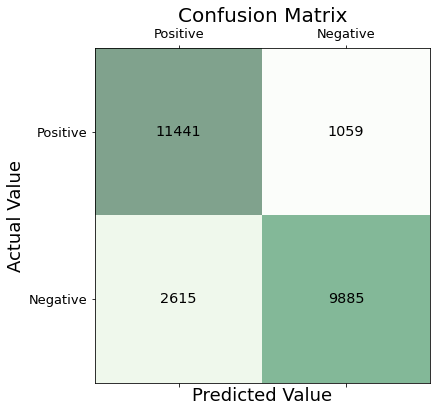


Area Under Curve Score: 85.30399999999999 %




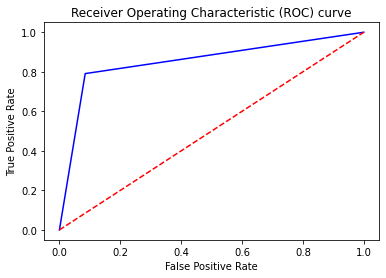

In [6]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Download the IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = 10000)

# Step 2: Preprocess the data
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension), dtype = np.float32)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

y_train = np.reshape(np.asarray(y_train, dtype = np.float32), (len(x_train), 1))
y_test = np.reshape(np.asarray(y_test, dtype = np.float32), (len(x_test), 1))

# Step 3: Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(input_shape = (10000,), units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Step 4: Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 5: Train the model
model.fit(x_train, y_train, epochs = 5, batch_size = 16)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('\nLoss:', loss)
print('Accuracy:', accuracy)
print("\n")

# Step 7: Preprocess the user's review
review = input('Enter a movie review: ')
review = review.lower()
review = review.split()
review = ' '.join(review)

# Step 8: Tokenize the user's review
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 10000)
review = tokenizer.texts_to_sequences([review])

# Step 9: Pad the user's review to the maximum length
review = tf.keras.preprocessing.sequence.pad_sequences(review, maxlen = 10000)

# Step 10: Generate a prediction for the user's review
prediction = model.predict(review)
if prediction[0] > 0.5:
    print("\nThis is a positive review.\n")
    
else:
    print("\nThis is a negative review.\n")

# Step 11: Generate predictions for the test data
predictions = model.predict(x_test)

# Step 12: Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)

# Step 13: Print the classification report
print(classification_report(y_test, predictions))

# Step 14: Plot the confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)
classes = ['Positive', 'Negative']
fig, ax = plt.subplots(figsize = (6, 9))
ax.matshow(confusion_matrix, cmap = plt.cm.Greens, alpha = 0.5)

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x = j, y = i, s = confusion_matrix[i, j], va = 'center', ha = 'center', size = 'x-large')
        
plt.xlabel('Predicted Value', fontsize = 18)
plt.ylabel('Actual Value', fontsize = 18)
plt.xticks(ticks = range(2), labels = classes, fontsize = 13)
plt.yticks(ticks = range(2), labels = classes, fontsize = 13)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

# Step 15: Calculate the AUC
auc = roc_auc_score(y_test, predictions)
print('\nArea Under Curve Score:', auc * 100, "%")
print("\n")

# Step 16: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.show()
